## Setup

### imports

In [1]:
import plotly.graph_objects as go

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

### definitions

In [3]:
path_data_dir = '../data/'

In [4]:
list_assets = ["PETR3.SA","PRIO3.SA", "VALE3.SA", "GGBR3.SA", "ABCB4.SA", "ITUB3.SA", "FLRY3.SA", "RADL3.SA"]

In [5]:
relevant_cols = ['Date', 'Close', 'Volume']

## Data 

In [6]:
dict_dfs = {}
for asset in list_assets:

    df = pd.read_csv(path_data_dir + f"processed/price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv", index_col= 0)
    
    dict_dfs.update({asset:df})

In [7]:
dict_dfs

{'PETR3.SA':                 Close      Volume     SMA_21   MSTD_21  Day_of_week  Weekend  \
 Date                                                                           
 2010-12-22  28.490000   3146900.0  28.108095  0.450062            2        0   
 2010-12-23  28.540001   2006300.0  28.139524  0.456338            3        0   
 2010-12-24  28.540001   2006300.0  28.139524  0.456338            4        0   
 2010-12-25  28.540001   2006300.0  28.139524  0.456338            5        1   
 2010-12-26  28.540001   2006300.0  28.139524  0.456338            6        1   
 ...               ...         ...        ...       ...          ...      ...   
 2024-02-25  43.619999  13303800.0  42.770000  1.167981            6        1   
 2024-02-26  44.080002   6699800.0  43.000476  0.878160            0        0   
 2024-02-27  43.970001   8188500.0  43.139048  0.780852            1        0   
 2024-02-28  41.599998  17368700.0  43.121905  0.811385            2        0   
 2024-02-29  41.

In [8]:
df_dp = pd.DataFrame({})

for asset, df in dict_dfs.items():
        
    df_rel = df['diff_close_mean_z_score'].reset_index()
    
    df_rel.rename({"diff_close_mean_z_score": asset},axis= 1, inplace = True)
    
    
    if len(df_dp) == 0:
        
        df_dp = df_rel
    else:
    
        df_dp = df_dp.merge(
            df_rel,
            on = 'Date',
            how = 'left'
        )

## Analysis

### Correlation

,PETR3.SA,PRIO3.SA,VALE3.SA,GGBR3.SA,ABCB4.SA,ITUB3.SA,FLRY3.SA,RADL3.SA
PETR3.SA,1.000000,0.299106,0.363926,0.382302,0.332698,0.499145,0.185479,0.117924
PRIO3.SA,0.299106,1.000000,0.300556,0.237050,0.177052,0.130420,0.122142,0.040903
VALE3.SA,0.363926,0.300556,1.000000,0.582309,0.171576,0.241367,0.125103,0.096279
GGBR3.SA,0.382302,0.237050,0.582309,1.000000,0.334522,0.368253,0.231238,0.104298
ABCB4.SA,0.332698,0.177052,0.171576,0.334522,1.000000,0.585860,0.246072,0.197841
ITUB3.SA,0.499145,0.130420,0.241367,0.368253,0.585860,1.000000,0.275842,0.254245
FLRY3.SA,0.185479,0.122142,0.125103,0.231238,0.246072,0.275842,1.000000,0.315681
RADL3.SA,0.117924,0.040903,0.096279,0.104298,0.197841,0.254245,0.315681,1.000000


None


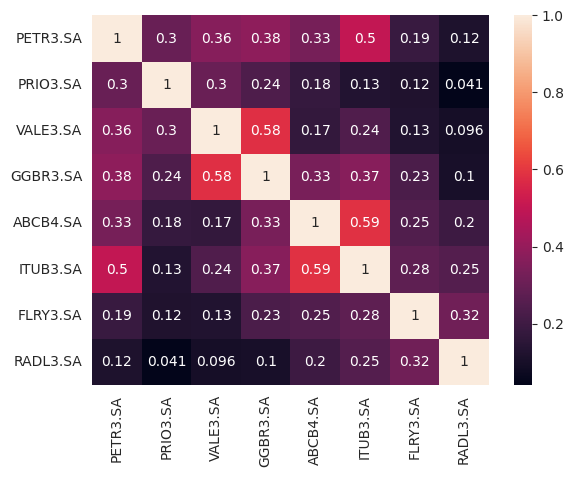

In [9]:
# close correlation
corr_mtrx_close = df_dp.drop('Date', axis = 1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()

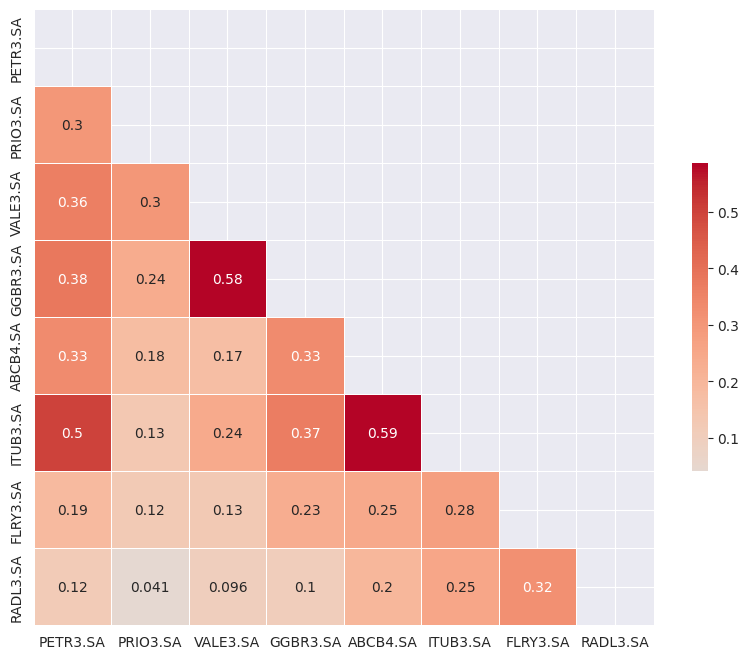

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'df_dp' seja o DataFrame original
corr_mtrx_close = df_dp.drop('Date', axis=1).corr()

# Criar uma máscara para a matriz superior
mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o heatmap com a máscara
sns.heatmap(corr_mtrx_close, annot=True, mask=mask, cmap='coolwarm', center=0, linewidths=0.5, cbar_kws={"shrink": .5})

# Exibir o gráfico
plt.show()


### Decompose

In [ ]:
#!pip install statsmodels

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
df_dp.Date = pd.to_datetime(df_dp.Date)

In [31]:
df_dp[['Date','PETR3.SA']].set_index('Date')

,PETR3.SA
Date,
2010-12-22,0.848559
2010-12-23,0.877588
2010-12-24,0.877588
2010-12-25,0.877588
2010-12-26,0.877588
...,...
2024-02-25,0.727751
2024-02-26,1.229304
2024-02-27,1.064163


In [35]:
df_dp.dtypes

Date        datetime64[ns]
PETR3.SA           float64
PRIO3.SA           float64
VALE3.SA           float64
GGBR3.SA           float64
ABCB4.SA           float64
ITUB3.SA           float64
FLRY3.SA           float64
RADL3.SA           float64
dtype: object

In [ ]:
df_dp[['Date','PETR3.SA']].set_index('Date')

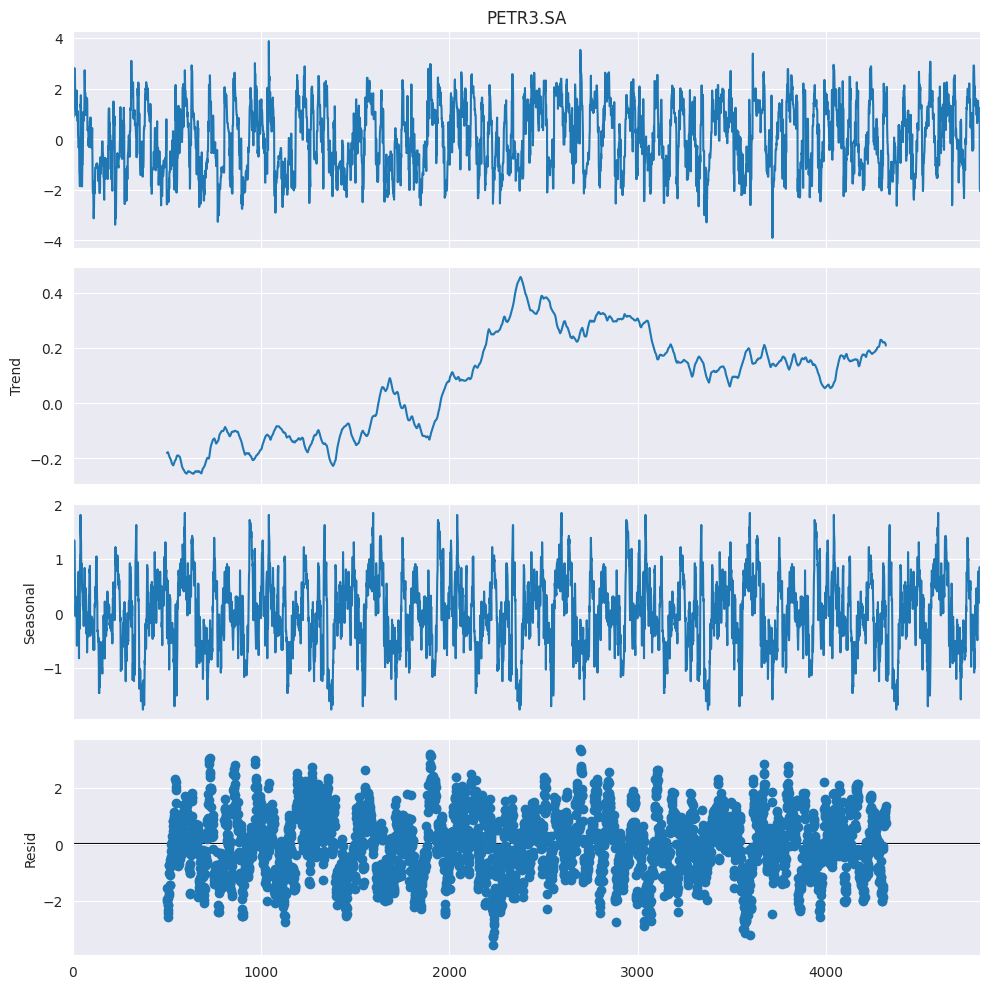

In [41]:
# Executando a decomposição
decomposition = seasonal_decompose(
    df_dp['PETR3.SA'], 
    model='additive', 
    period=1000
    )  # Ajuste o período conforme necessário

# Plotando os resultados
plt.rcParams.update({'figure.figsize': (10, 10)})
decomposition.plot()
plt.show()

### ff

In [10]:


# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers', name='markers'))

fig.show()

NameError: name 'random_x' is not defined

Date
2010-12-22   -0.075831
2010-12-23   -0.300757
2010-12-24   -0.300757
2010-12-25   -0.300757
2010-12-26   -0.300757
                ...   
2024-02-25    1.301530
2024-02-26    1.897895
2024-02-27    1.740712
2024-02-28    1.702107
2024-02-29    1.572396
Name: diff_close_mean_z_score, Length: 4818, dtype: float64

In [ ]:
dict_dfs[asset_list[0]].index

In [ ]:
for asset_list in [["PETR3.SA","PRIO3.SA"],
["VALE3.SA", "GGBR3.SA"],
["ABCB4.SA", "ITUB3.SA"],
["FLRY3.SA", "RADL3.SA"]]:
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dict_dfs[asset_list[0]].index, y=dict_dfs[asset_list[0]]['diff_close_mean_z_score'],
                        mode='lines',
                        name=asset_list[0]))
    fig.add_trace(go.Scatter(x=dict_dfs[asset_list[1]].index, y=dict_dfs[asset_list[1]]['diff_close_mean_z_score'],
                        mode='lines',
                        name=asset_list[1]))

    fig.show()



: 